C:\Users\MAHESH\AppData\Local\Temp\ipykernel_23532\765656587.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df[['Close']].fillna(method='ffill')


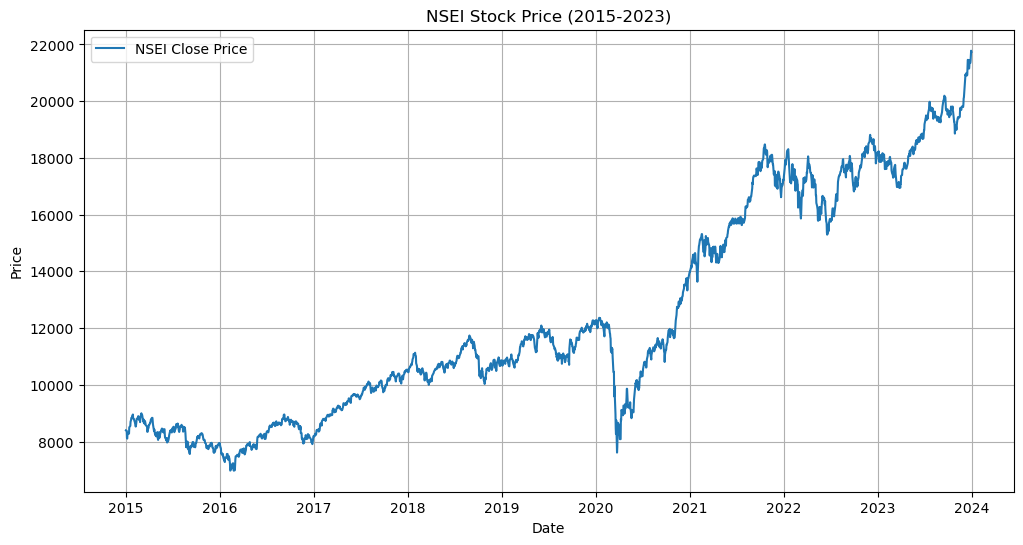

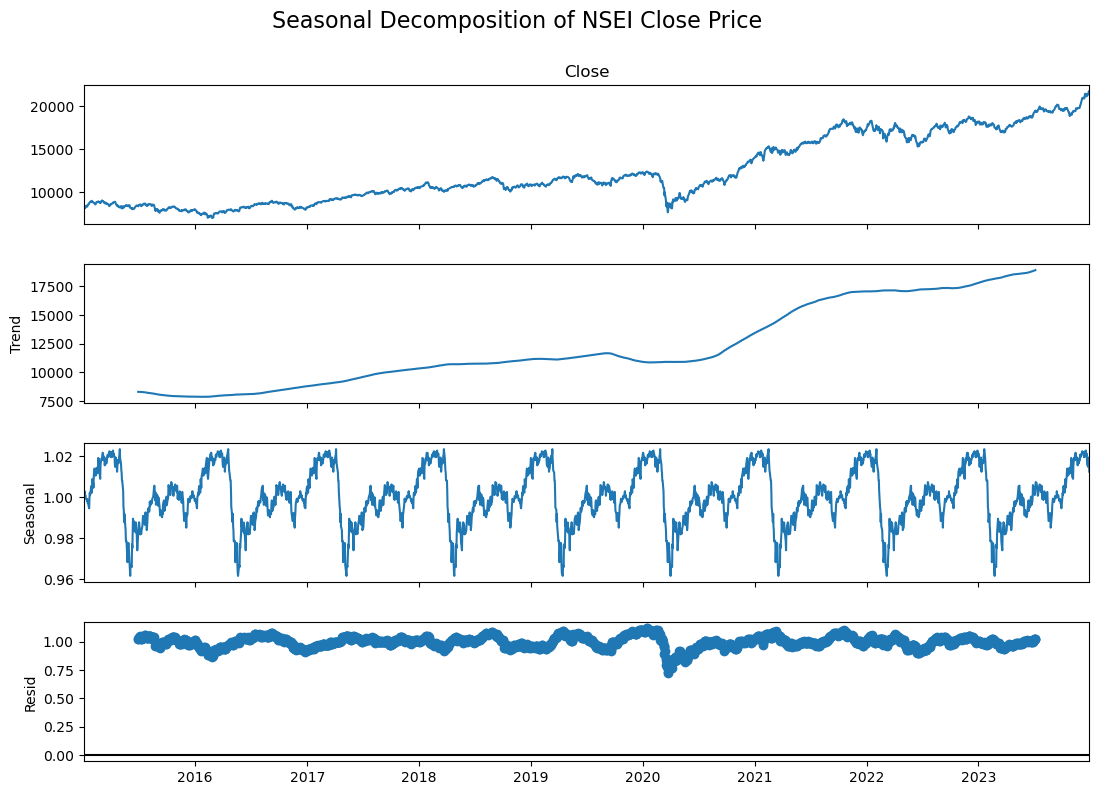

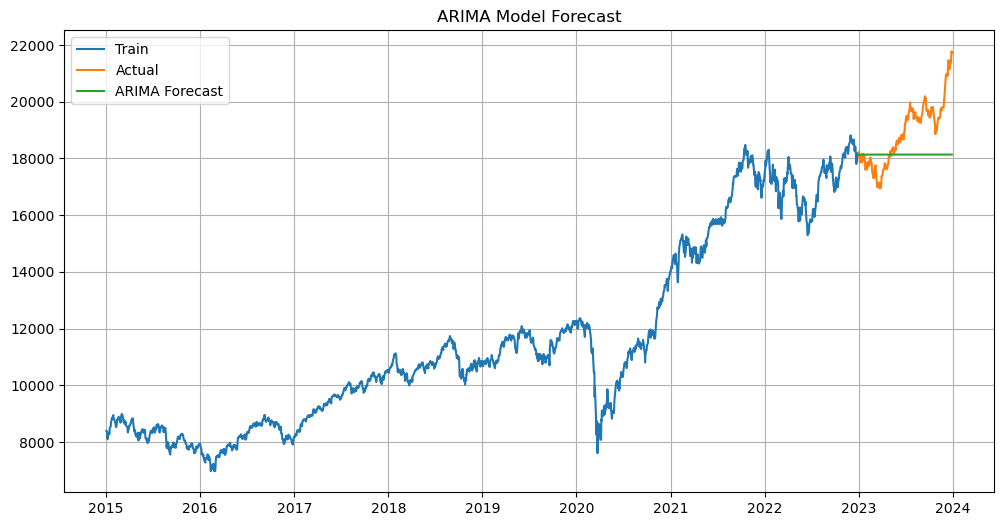

ARIMA MSE: 1808065.79


C:\Users\MAHESH\Downloads\a1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MAHESH\Downloads\a1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
df = pd.read_csv("NSEI 2015-2023.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('B')
df = df[['Close']].fillna(method='ffill')
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='NSEI Close Price')
plt.title("NSEI Stock Price (2015-2023)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
fig = result.plot()
fig.set_size_inches(12, 8)
fig.suptitle("Seasonal Decomposition of NSEI Close Price", fontsize=16, y=1.02)
plt.show()
train = df[:'2022']
test = df['2023':]
arima_model = ARIMA(train['Close'], order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Model Forecast")
plt.grid()
plt.show()
mse_arima = mean_squared_error(test['Close'], arima_forecast)
print(f"ARIMA MSE: {mse_arima:.2f}")

sarima_model = SARIMAX(train['Close'], order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=len(test))

print(sarima_forecast.head()) 

plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Actual')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Model Forecast")
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error
mse_sarima = mean_squared_error(test['Close'], sarima_forecast)
print(f"SARIMA MSE: {mse_sarima:.2f}")

